In [1]:
# Import TensorFlow Datasets
# ! pip install tensorflow_datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\mnist\3.0.1.incompleteEVDCHT\mnist-train.tfrecord*...:   0%|          | 0/6000…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\mnist\3.0.1.incompleteEVDCHT\mnist-test.tfrecord*...:   0%|          | 0/10000…

Dataset mnist downloaded and prepared to ~\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [3]:
print(len(train_dataset), len(test_dataset))

60000 10000


In [4]:
# You can also try: for (image, label) in test_dataset.take(25):
# And try enumurate
count = 0
for i in test_dataset.as_numpy_iterator(): 
    if count == 5 :
        print (i[0])
    count +=1
print(count)

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 69]
  [176]
  [254]
  [136]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [5]:
print(type(test_dataset), len(test_dataset))

count = 0
for i in test_dataset.as_numpy_iterator():
    if count < 10 :
        print (len(i), '\t', i[0].shape, '\t', i[1])
    count +=1

print(count)

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'> 10000
2 	 (28, 28, 1) 	 2
2 	 (28, 28, 1) 	 0
2 	 (28, 28, 1) 	 4
2 	 (28, 28, 1) 	 8
2 	 (28, 28, 1) 	 7
2 	 (28, 28, 1) 	 6
2 	 (28, 28, 1) 	 0
2 	 (28, 28, 1) 	 6
2 	 (28, 28, 1) 	 3
2 	 (28, 28, 1) 	 1
10000


In [6]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

#train_dataset =  train_dataset.cache()
#test_dataset  =  test_dataset.cache()

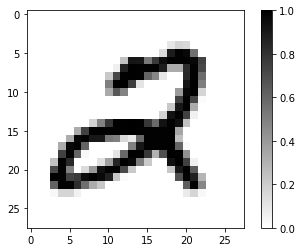

In [7]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
count = 0
for (image, label) in test_dataset.take(25):
    print (label.numpy(), end='\t')
    count += 1
    if count % 5 == 0:
        print()
plt.show()

2	0	4	8	7	
6	0	6	3	1	
8	0	7	9	8	
4	5	3	4	0	
6	6	3	0	2	


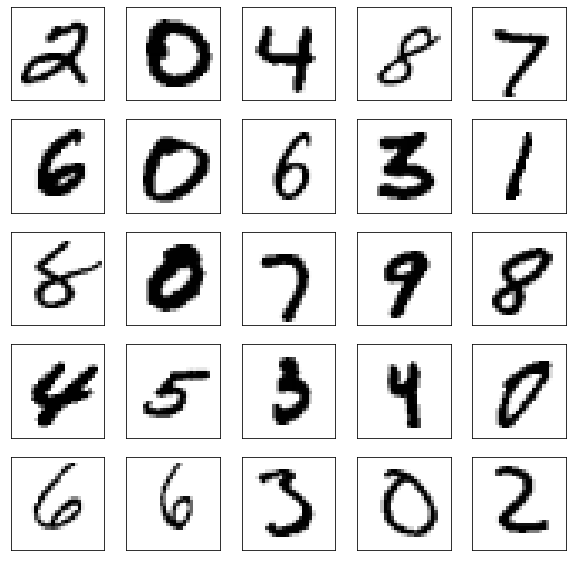

In [9]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [10]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [11]:
print (train_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
hist = model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2540 - accuracy: 0.9281
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1192 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0611 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - accuracy: 0.9866


In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9762
Accuracy on test dataset: 0.9761999845504761


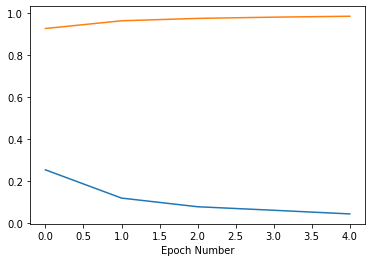

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['loss']);
plt.plot(hist.history['accuracy']);


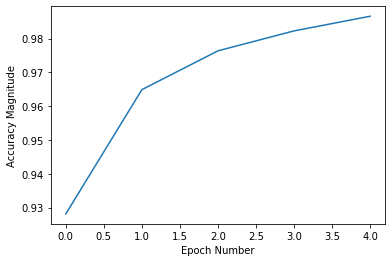

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy Magnitude")
plt.plot(hist.history['accuracy']);

In [18]:
model.save('mnist_2.h5')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
